# Wrangling project
#### By Wei Chun Chang
#### This project aim at practicing my skills of collecting data with social network API. I took Twitter as an example to demonstrate collecting post data of an account, merging it with other datasets, and making a simple plot to see how we can explore after data wrangling

## Data wrangling has three main parts : 
* Gathering data
* Accessing data
* Cleaning data. 

## Gathering data

Loading the libraries I need and the twitter-archive-enhanced.csv Udacity offered.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import sys
from twython import Twython

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


I downloaded image-predictions.tsv programmatically with request, then readed it with pandas, setting the delimiter as ‘\t’.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [5]:
image = pd.read_csv('image-predictions.tsv',delimiter='\t')

In [6]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The most difficult part in this project is loading the third data, tweet_json.txt. I spent a lot of time studying how to store the data and transform into a dataframe. After reading few posts on stackoverflow, I created a dictionary with few empty lists in there. I used a for loop to run the tweepy api with setting wait_on_rate_limit as True so that I can gather the data from each id. Then I store each value into the lists I created in the dictionary. I transformed the dictionary into a dataframe so that I can concat these three dataframes into one.

In [7]:
CONSUMER_KEY = "CONSUMER_KEY"
CONSUMER_SECRET = "CONSUMER_SECRET"
OAUTH_TOKEN = "OAUTH_TOKEN"
OAUTH_TOKEN_SECRET = "OAUTH_TOKEN_SECRET"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

text = {}
text['id'] =[]
text['likes'] = []
text['retweet'] = []
for i in df.tweet_id:
    try:
        tweet = api.get_status(id=i)
        txt = tweet._json
        text['id'].append(txt['id'])
        text['likes'].append(txt['favorite_count'])
        text['retweet'].append(txt['retweet_count'])
    except:
        e = sys.exc_info()[0]
        print( "<p>Error: %s</p>" % e )
with open('tweet_json.txt', 'w') as file:
             file.write(json.dumps(text))

<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
<p>Error: <class 'tweepy.error.TweepError'></p>
Rate limit reached. Sleeping for: 731
Rate limit reached. Sleeping for: 727


In [8]:
tweet_text = pd.DataFrame.from_dict(text)

In [9]:
tweet_text.head(10)

,id,likes,retweet
0,892420643555336193,38969,8643
1,892177421306343426,33358,6351
2,891815181378084864,25141,4213
3,891689557279858688,42308,8759
4,891327558926688256,40472,9522
5,891087950875897856,20294,3155
6,890971913173991426,11901,2105
7,890729181411237888,65825,19159
8,890609185150312448,27880,4321
9,890240255349198849,32074,7524


In [118]:
twitter_archive_master = pd.concat([df, image,tweet_text], axis=1, join='inner')

In [119]:
from IPython.display import display
pd.options.display.max_columns = None
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,likes,retweet
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,892420643555336193,38969,8643
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,892177421306343426,33358,6351
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,25141,4213
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,42308,8759
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,891327558926688256,40472,9522


# Accessing data

After gathering data, I move on to the accessing part.

### I'll start it with the quality issues

* Completeness

* Uniqueness

* Timeliness

* Validity

* Accuracy

* Consistency

In [120]:
twitter_archive_master.shape

(2075, 32)

### First, I want to check the null values in this dataset

In [121]:
pd.isnull(twitter_archive_master).sum()

tweet_id                         0
in_reply_to_status_id         2001
in_reply_to_user_id           2001
timestamp                        0
source                           0
text                             0
retweeted_status_id           1896
retweeted_status_user_id      1896
retweeted_status_timestamp    1896
expanded_urls                   56
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
tweet_id                         0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf                          0
p3_dog              

In [122]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 32 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2019 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
tweet_id                      20

** I found that the timestamp is object instead of datetime **

In [123]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,tweet_id,img_num,p1_conf,p2_conf,p3_conf,id,likes,retweet
count,2.075000e+03,7.400000e+01,7.400000e+01,1.790000e+02,1.790000e+02,2075.000000,2075.000000,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2.075000e+03,2075.000000,2075.000000
mean,7.528286e+17,7.496820e+17,2.123045e+16,7.732075e+17,1.255572e+16,13.697349,10.520964,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02,7.519075e+17,9001.149880,3374.250602
std,6.700513e+16,7.563070e+16,1.285751e+17,6.172183e+16,9.652124e+16,48.849166,7.183027,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02,6.689147e+16,12608.542324,5265.820235
min,6.708428e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,6.708046e+17,0.000000,0.000000
25%,6.888613e+17,6.788507e+17,3.086374e+08,7.289240e+17,4.196984e+09,10.000000,10.000000,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02,6.878341e+17,2084.500000,804.000000
50%,7.447100e+17,7.185468e+17,4.196984e+09,7.806013e+17,4.196984e+09,11.000000,10.000000,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02,7.432532e+17,4180.000000,1727.000000
75%,8.104710e+17,8.305769e+17,4.196984e+09,8.205322e+17,4.196984e+09,12.000000,10.000000,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02,8.086175e+17,11305.500000,3825.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,143964.000000,77722.000000


** I found that some of the rating numerator are lower than 10 or higher than 15. This disobey the unique rating system of WeRateDog. Therefore, I take these rows as the others' tweet instead of WeRateDog **

In [124]:
twitter_archive_master[twitter_archive_master.rating_numerator < 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,likes,retweet
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False,883360690899218434,22644,3738
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None,670403879788544000,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1,pug,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True,847617282490613760,7435,457
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False,834089966724603904,10811,2362
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None,673352124999274496,https://pbs.twimg.com/media/CVg6L2hWIAAYuEb.jpg,1,golden_retriever,0.672808,True,Labrador_retriever,0.275885,True,kuvasz,0.022255,True,825147591692263424,19862,5128
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None,674805413498527744,https://pbs.twimg.com/ext_tw_video_thumb/67480...,1,English_springer,0.594467,True,cocker_spaniel,0.389994,True,Welsh_springer_spaniel,0.007096,True,816697700272001025,10703,2483


In [125]:
twitter_archive_master[twitter_archive_master.rating_numerator > 15].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,likes,retweet
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,667062181243039745,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake_Bay_retriever,0.825678,True,vizsla,0.090998,True,kelpie,0.022956,True,881536004380872706,49673,16207
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None,669371483794317312,https://pbs.twimg.com/media/CUoVz8rU8AAfW-c.jpg,1,Brabancon_griffon,0.483268,True,miniature_pinscher,0.307465,True,redbone,0.070524,True,855459453768019968,31153,8793
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762,True,Norfolk_terrier,0.107479,True,Lakeland_terrier,0.097846,True,855245323840757760,0,6377
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False,837110210464448512,17182,2659
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True,834209720923721728,22165,5321


** And meanwhile, I found some of the rating_denominator are not 10 **

In [126]:
twitter_archive_master[twitter_archive_master.rating_denominator != 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,likes,retweet
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True,834209720923721728,22165,5321
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None,672256522047614977,https://pbs.twimg.com/media/CVRVvRMWEAIBKOP.jpg,1,ostrich,0.999004,False,Arabian_camel,0.000512,False,llama,0.000147,False,831552930092285952,9718,2558
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False,819588359383371776,10411,2217
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None,676430933382295552,https://pbs.twimg.com/media/CWMqV7WUYAEEClG.jpg,1,golden_retriever,0.583875,True,cocker_spaniel,0.203671,True,Labrador_retriever,0.036122,True,809084759137812480,14461,3967
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,690021994562220032,https://pbs.twimg.com/media/CZNzV6cW0AAsX7p.jpg,1,badger,0.289550,False,weasel,0.099140,False,malamute,0.040696,True,773308824254029826,25353,8419


In [127]:
twitter_archive_master.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

** I found those with p1.value_counts 1 are not related to dogs **

In [128]:
twitter_archive_master[twitter_archive_master.img_num != 1].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,likes,retweet
144,863907417377173506,NaN,NaN,2017-05-15 00:02:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's quite impressive at hide a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863907417...,13,10,Albus,None,None,None,None,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False,863427515083354112,2317,102
312,835264098648616962,NaN,NaN,2017-02-24 23:04:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. Her hobbies include being precious ...,NaN,NaN,NaN,https://www.gofundme.com/lolas-life-saving-sur...,12,10,Lola,None,None,None,None,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False,834458053273591808,10342,1859
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False,834089966724603904,10811,2362
319,834477809192075265,NaN,NaN,2017-02-22 18:59:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leo. He was a skater pu...,8.295020e+17,4.196984e+09,2017-02-09 01:27:41 +0000,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True,833732339549220864,0,242
345,831939777352105988,NaN,NaN,2017-02-15 18:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo,None,None,None,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False,831309418084069378,12622,2714


In [129]:
twitter_archive_master[twitter_archive_master.name == 'None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,likes,retweet
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,891087950875897856,20294,3155
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,890729181411237888,65825,19159
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True,889665388333682689,48275,10193
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None,666353288456101888,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,1,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True,887101392804085760,30677,6040
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False,886983233522544640,35309,7868


In [130]:
twitter_archive_master.name.value_counts()

None         650
a             27
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker         9
Bo             9
Penny          9
Winston        8
Sadie          8
Buddy          7
Toby           7
Bailey         7
Jax            6
Leo            6
Daisy          6
Jack           6
Stanley        6
Milo           6
Oscar          6
Bella          6
Phil           5
Sammy          5
Oakley         5
Koda           5
the            5
Rusty          5
Dave           5
            ... 
Augie          1
Pupcasso       1
Shadoe         1
Eriq           1
Shooter        1
Sprinkles      1
Freddery       1
Pipsy          1
Miley          1
Einstein       1
Brooks         1
Alexander      1
Spanky         1
Jebberson      1
Lance          1
Ivar           1
Rooney         1
Alfy           1
Ralpher        1
Ed             1
Dylan          1
Fillup         1
Timmy          1
Emma           1
Dunkin         1
Jimbo          1
Chubbs         1
Malikai       

In [162]:
twitter_archive_master.likes.value_counts()

0        102
2317       3
4627       2
4400       2
6862       2
6976       2
3697       2
2193       2
761        2
2979       2
4583       2
2655       2
6656       2
2003       2
4680       2
2402       2
3104       2
11726      2
15984      1
1622       1
2620       1
56644      1
17098      1
2759       1
31430      1
2757       1
2621       1
12992      1
15038      1
8918       1
        ... 
3355       1
1304       1
9492       1
3400       1
1355       1
30080      1
1376       1
3454       1
1405       1
11641      1
3437       1
15723      1
3433       1
5478       1
9573       1
11619      1
3425       1
3423       1
13644      1
40286      1
7517       1
21852      1
1371       1
1370       1
1366       1
2085       1
27985      1
3491       1
24865      1
3071       1
Name: likes, Length: 849, dtype: int64

## Notes about the issues

I first check the completeness of the data programmatically and found few quality issues, including great proportion of NA values in some columns, duplicated id columns, wrong datatype for timestamp, inaccurate values in rating_numerator and rating_denominator, like those values lower than 10 or higher than 15 in rating_numerator or those values not equals to 10 in rating_denominator, some of the rows are not related to dogs, some of the names in the data are ‘none’, ‘a’, or ‘his’. I’m done with the quality issues.

Now let’s move on the tidiness issues. I can only access the tidiness issues visually. I found that four columns of dog stage should be included in one column and that rating can be included in the same column instead of two. 

### Quality issues

* Great proportions of null vlaues in in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp columns

* Three tweet_id (2 tweet_id & 1 id) in the dataset

* Timestamp's datatype should be datetime

* Some rows have rating_numerator lower than 10 or higher than 15

* Some of the rating_denominator are not 10

* Some rows have nothing to do dogs

* Some of the names show none

* 'a' and 'his' in name column

* Great proportion of the likes is 0

### Tidiness issues

* The stage of dog should be a column rather than four columns

* rating_numerator and rating_denominator can be included into one column

# Cleaning data

So here comes to the cleaning part.

* Great proportions of null vlaues in in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp columns

** since I won't use this column to do any anlysis and almost all of them are NA, I'll drop it **

In [131]:
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                                     'retweeted_status_id','retweeted_status_user_id',
                                                    'retweeted_status_timestamp'],axis = 1)

* Three tweet_id (2 tweet_id & 1 id) in the dataset

** I'll drop the duplicated two **

In [132]:
twitter_archive_master = twitter_archive_master.drop(['tweet_id'],axis = 1)

* Timestamp's datatype should be datetime

In [133]:
import time
twitter_archive_master.timestamp = twitter_archive_master.timestamp.apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(x,'%Y-%m-%d %H:%M:%S +0000')))
twitter_archive_master.timestamp = np.array(twitter_archive_master.timestamp,dtype='datetime64[ns]')

* Some rows have rating_numerator lower than 10 or higher than 15

** I'll drop these since they are not from WeRateDog **

In [134]:
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['rating_numerator'] <= 10].index)

In [135]:
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['rating_numerator'] >= 15].index)

* Some of the rating_denominator are not 10

** I'll drop these since they are not from WeRateDog **

In [136]:
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['rating_denominator'] != 10].index)

* Some rows have nothing about dogs

In [137]:
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['p1_dog'] == False].index)

* Some of the names show none

In [138]:
twitter_archive_master.loc[(twitter_archive_master.name == 'None'),'name'] = 'Unknown'

* 'a' and 'his' in name column

In [139]:
twitter_archive_master.loc[(twitter_archive_master.name == 'a'),'name'] = 'Alpha'
twitter_archive_master.loc[(twitter_archive_master.name == 'his'),'name'] = 'His'

* Great proportion of the likes is 0

In [163]:
twitter_archive_master = twitter_archive_master.drop(twitter_archive_master[twitter_archive_master['likes'] == 0].index)

* The stage of dog should be a column rather than four columns

In [140]:
twitter_archive_master['Stage'] = 'Unknown'
twitter_archive_master.loc[(twitter_archive_master.doggo == 'doggo'),'Stage']='doggo'
twitter_archive_master.loc[(twitter_archive_master.floofer == 'floofer'),'Stage']='floofer'
twitter_archive_master.loc[(twitter_archive_master.pupper == 'pupper'),'Stage']='pupper'
twitter_archive_master.loc[(twitter_archive_master.puppo == 'puppo'),'Stage']='puppo'

In [141]:
twitter_archive_master = twitter_archive_master.drop(['doggo','floofer','pupper','puppo'],axis = 1)

* rating_numerator and rating_denominator can be included into one column

In [142]:
twitter_archive_master['Rating'] = twitter_archive_master['rating_numerator'].astype(str) + '/' + twitter_archive_master['rating_denominator'].astype(str)

In [143]:
twitter_archive_master['Rating_number'] = twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']

In [144]:
twitter_archive_master = twitter_archive_master.drop(['rating_numerator','rating_denominator'],axis = 1)

I removed the columns with over 90% of NA and two duplicated tweet_id, transformed the datatype of timestamp into datetime64[ns], dropped those inaccurate ratings and those not related to dogs, changed the name of ‘None’ into ‘Unknown’, and named those ‘a’ ‘Alpha’ and ‘his’ to ‘His’ since I think that might be the dog’s real name. I combine four columns of dog stage into one column and filled those without any stage with ‘Unknown’, put rating_numerator and rating_denominator together, then drop them. Finally, I save the dataframe as a csv file.

In [145]:
twitter_archive_master.sample(10)

,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,likes,retweet,Stage,Rating,Rating_number
815,2016-08-31 15:19:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,https://twitter.com/katieornah/status/77100213...,Unknown,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True,769335591808995329,0,8624,pupper,12/10,1.2
1566,2016-01-15 03:39:15,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13/10 I can't stop watching this (vid by @k8ly...,https://vine.co/v/iOWwUPH1hrw,Unknown,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True,687399393394311168,2037,690,Unknown,13/10,1.3
958,2016-07-08 16:44:23,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper that's very hungry but too laz...,https://twitter.com/dog_rates/status/751456908...,Unknown,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1,golden_retriever,0.908784,True,Labrador_retriever,0.030361,True,tennis_ball,0.004996,False,750132105863102464,3926,1403,pupper,12/10,1.2
268,2017-03-14 00:04:30,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,https://twitter.com/dog_rates/status/841439858...,Unknown,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,basset,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True,840696689258311684,13160,1089,Unknown,14/10,1.4
1562,2016-01-16 04:11:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Derby. He's a superstar. 13/10 (vid by...,https://twitter.com/dog_rates/status/688211956...,Derby,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True,687494652870668288,2061,637,Unknown,13/10,1.3
1613,2016-01-08 04:21:00,"<a href=""http://twitter.com/download/iphone"" r...",I would like everyone to appreciate this pup's...,https://twitter.com/dog_rates/status/685315239...,Unknown,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,Staffordshire_bullterrier,0.327887,True,American_Staffordshire_terrier,0.271916,True,Labrador_retriever,0.247619,True,684880619965411328,2255,916,Unknown,11/10,1.1
826,2016-08-27 00:47:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ever seen a dog pet another dog...,"https://vine.co/v/iXQAm5Lrgrh,https://vine.co/...",Unknown,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador_retriever,0.340008,True,bull_mastiff,0.175316,True,box_turtle,0.164337,False,767754930266464257,17478,6059,Unknown,13/10,1.3
1732,2015-12-24 00:58:27,"<a href=""http://twitter.com/download/iphone"" r...",Everybody look at this beautiful pupper 13/10 ...,https://twitter.com/dog_rates/status/679828447...,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True,679405845277462528,2553,1334,pupper,13/10,1.3
1400,2016-02-16 04:15:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,https://twitter.com/dog_rates/status/699446877...,Archie,https://pbs.twimg.com/media/CqqmWa7WcAAIM-n.jpg,1,basenji,0.183283,True,Italian_greyhound,0.136012,True,whippet,0.060130,True,698989035503689728,3643,1084,Unknown,12/10,1.2
2037,2015-12-01 05:26:34,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,https://twitter.com/dog_rates/status/671561002...,the,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True,671511350426865664,1684,773,Unknown,13/10,1.3


In [164]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# Report

** The first question that appear in my head is what kinds of dog are popular on Twitter **

** So there are three ways to measure this **

** One is by the rating score, another is by likes, and the other is by retweet **

In [112]:
import seaborn as sns

In [165]:
pop_dog = twitter_archive_master.groupby('p1')['likes'].mean().reset_index()
pop_dog.sort_values('likes', ascending=False).head()

,p1,likes
10,Brabancon_griffon,66084.000000
32,Japanese_spaniel,48924.000000
61,Walker_hound,48275.000000
30,Irish_water_spaniel,38871.000000
6,Blenheim_spaniel,31637.333333


It’s easy to use likes to compare one kind of dog with others. I can clearly see that Brabancon Griffon are super popular among the dogs, much higher than the runner-up.

In [166]:
pop_dog = twitter_archive_master.groupby('p1')['Rating_number'].mean().reset_index()
pop_dog.sort_values('Rating_number', ascending=False).head()

,p1,Rating_number
86,komondor,1.35
42,Norwich_terrier,1.30
61,Walker_hound,1.30
99,standard_schnauzer,1.30
78,curly-coated_retriever,1.30


Obviously, it is pretty hard to compare one to another since the difference between two kinds of dogs is too small. 

In [167]:
pop_dog = twitter_archive_master.groupby('p1')['retweet'].mean().reset_index()
pop_dog.sort_values('retweet', ascending=False).head()

,p1,retweet
10,Brabancon_griffon,26151.000000
32,Japanese_spaniel,18390.000000
30,Irish_water_spaniel,12976.000000
26,Greater_Swiss_Mountain_dog,12789.000000
15,Dandie_Dinmont,12412.666667


The first two place of average retweet amount is the same as that of likes. And Brabancon Griffon is still taking the lead by pretty great amount of retweet. 

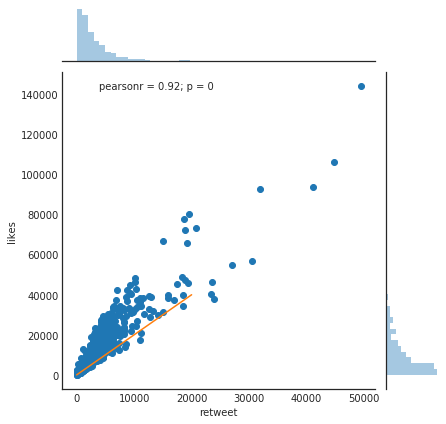

In [168]:
with sns.axes_style('white'):
    p = sns.jointplot('retweet','likes', data=twitter_archive_master)
    p.ax_joint.plot(np.linspace(0,20000),
                   np.linspace(0,40000))

In the end, I made this plot to see the distribution of likes and retweet. Basically, most of the posts have up to 50000 likes and 10000 retweet. However, some of the posts are really hot. As we can see that there are few posts having over 80000 likes and 30000 retweet. For me that is a lot. To sum up, though it seems that some kinds of dogs are more popular than the others, as WeRateDog said, ”they are good dog.” Dogs are our best friends. Even there are some numbers telling some dogs are more popular than the others, we should love each of them. In my opinion, dogs don’t care how popular their owner is. We should hold the same idea treating them.